# EXAMEN PRIMER PARCIAL
### Beth Yaravi Perez Torres. Modelos Computacionales II

1. Reproducir el análisis de PCA aplicado al Iris dataset, utilizando 3 componentes.

    1.1. Indicar el porcentaje de la información utilizando los 3 componentes principales.
    
    1.2. Hacer el scatter 3D de los datos proyectados, con cualquiera de los 3 métodos.

In [59]:
import os
import pandas as pd
import numpy as np

In [141]:
# Aqui mandamos llamar a nuestra hoja de datos
path = r"/home/bubblebeth/GitHub/Neurociencias-2025-2/S03_datasets/iris/iris.csv"
df = pd.read_csv(path)
df.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [138]:
df.shape

(150, 5)

In [139]:
df['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [61]:
# Aqui eliminamos la columna de especies
X = df.iloc[:, :4]; X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


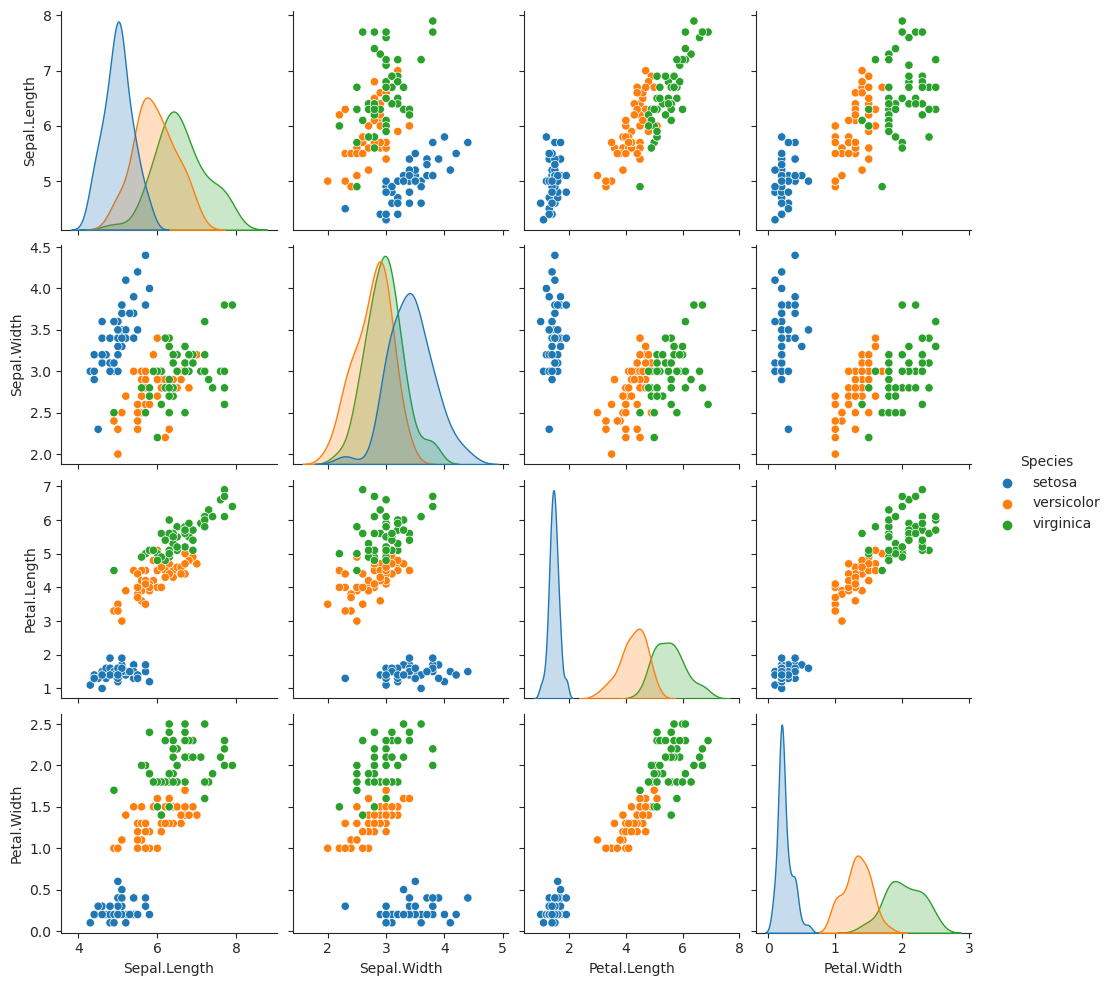

In [140]:
import seaborn as sns
sns.pairplot(df, hue="Species")

In [62]:
# Aqui normalizamos el dataframe
media, sigma = X.mean(axis=0), X.std(axis=0)
X_std = (X - media)/sigma
X_std.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


In [63]:
X_std.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-5.210647e-16,-7.579123e-16,-2.842171e-16,-3.789561e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.863780e+00,-2.425820e+00,-1.562342e+00,-1.442245e+00
25%,-8.976739e-01,-5.903951e-01,-1.222456e+00,-1.179859e+00
50%,-5.233076e-02,-1.315388e-01,3.353541e-01,1.320673e-01
75%,6.722490e-01,5.567457e-01,7.602115e-01,7.880307e-01
max,2.483699e+00,3.080455e+00,1.779869e+00,1.706379e+00


In [64]:
# Calculamos la matriz de covarianza
cov_matrix = (X_std - X_std.mean(axis=0)).T.dot((X_std - X_std.mean(axis=0)))/(X_std.shape[0]-1)
cov_matrix

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


In [65]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[2.91849782 0.91403047 0.14675688 0.02071484]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [66]:
# Aqui calculamos el porcentaje de cada vector propio
eigen_pairs = [(np.abs(eig_vals[i]), eig_vectors[:,i]) for i in range(len(eig_vectors))]
eigen_pairs

[(2.918497816531995,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9140304714680701,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.14675687557131545,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020714836428619564,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [67]:
# Ordenamos de mayor a menor
eigen_pairs.sort(reverse=True)

# Calculamos los porcentajes
total_sum = sum(eig_vals)
var_exp = [(i/total_sum)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [68]:
total_sum

4.0

In [69]:
print('El porcentaje de información que cada valor propio aporta es:')
var_exp

El porcentaje de información que cada valor propio aporta es:


[72.96244541329987, 22.850761786701753, 3.668921889282886, 0.5178709107154891]

In [70]:
print('El porcentaje de información acumulado es:')
cum_var_exp

El porcentaje de información acumulado es:


array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

**Esta ultima linea nos dice que al usar los tres componentes principales el porcentaje de informacion que obtendremos sera de 99.48212909%**

In [71]:
# Aqui creamos la matriz qye representa la transformacion lineal
eigen_pairs

[(2.918497816531995,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9140304714680701,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.14675687557131545,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020714836428619564,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [72]:
eigen_pairs[0][1], eigen_pairs[1][1], eigen_pairs[2][1]

(array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]),
 array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]),
 array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]))

In [73]:
T_matrix = np.stack((eigen_pairs[0][1], eigen_pairs[1][1], eigen_pairs[2][1]), axis=1)
T_matrix

array([[ 0.52106591, -0.37741762, -0.71956635],
       [-0.26934744, -0.92329566,  0.24438178],
       [ 0.5804131 , -0.02449161,  0.14212637],
       [ 0.56485654, -0.06694199,  0.63427274]])

In [74]:
T_matrix.shape

(4, 3)

In [75]:
# Aqui pasamos todos los datos segun los componenetes que utilizaremos
espacio_proyectado = []

for idx in range(len(X_std)):
    vec = X_std.iloc[idx, :]
    Tvec = T_matrix.T.dot(vec)
    espacio_proyectado.append(Tvec)
espacio_proyectado_np = np.array(espacio_proyectado)
espacio_proyectado_np.shape

(150, 3)

In [142]:
FrameDat = pd.DataFrame({'CP1': espacio_proyectado_np[:, 0], 
                         'CP2': espacio_proyectado_np[:, 1],
                         'CP3': espacio_proyectado_np[:, 2],
                         'Species': df['Species']
                        })

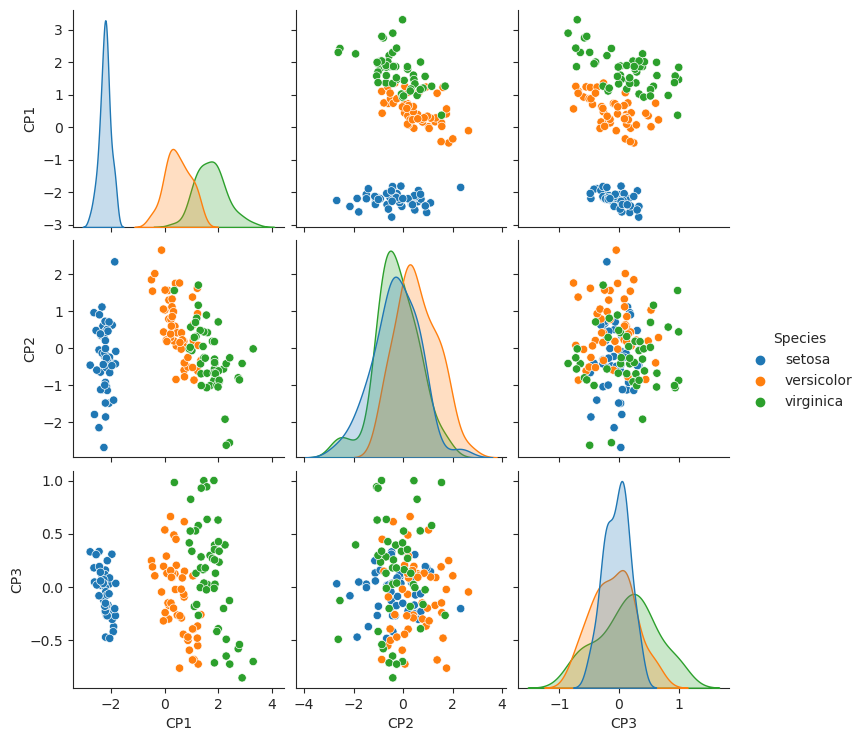

In [143]:
sns.pairplot(FrameDat, hue='Species')

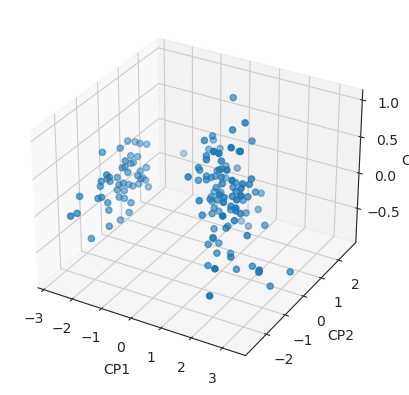

In [186]:
# Aqui hacemos nuestro plot3D
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style ("ticks")
sea_plot = plt.axes (projection='3d')

CP1 = espacio_proyectado_np[:, 0]
CP2 = espacio_proyectado_np[:, 1]
CP3 = espacio_proyectado_np[:, 2]

sea_plot.scatter3D (CP1, CP2, CP3)
sea_plot.set_xlabel ('CP1')
sea_plot.set_ylabel ('CP2')
sea_plot.set_zlabel ('CP3')


sea_plot.scatter3D
plt.show ()

## SEGUNDO EJERCICIO

2. Realizar el análisis de PCA utilizando el dataset Brain_tumor, archivo Brain tumor.csv.

    2.0. Que notan de extrano con la columna Coarseness al normalizar el dataset?

    2.1. Determinar el porcentaje de aporte de cada vector propio.
    
    2.2. Determinar cuántos componentes principales son necesarios para obtener al menos un 90% de datos.
    
    2.3. Realizar la proyección de la data original al espacio reducido mediante 2 métodos y comparar resultados.
    
    2.4. Hacer la comparsión de los pairplot con la data original y la data proyectada.

In [151]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Aqui llamamos a nuestro documento
path1 = r"/home/bubblebeth/GitHub/Neurociencias-2025-2/S03_datasets/Brain_tumor/Brain Tumor.csv"
datos = pd.read_csv(path1)
datos.head(2)

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155


In [152]:
# Aqui excluimos la columna que no nos interesa, quite la columna 0 y 14
X1 = datos.iloc[:, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]
X1

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation
0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939
1,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834
2,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014
3,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189
4,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789
...,...,...,...,...,...,...,...,...,...,...,...,...
3757,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972
3758,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749
3759,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181
3760,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898


In [153]:
media1, sigma1 = X1.mean(axis=0), X1.std(axis=0)
X1_std = (X1 - media1)/sigma1
X1_std.head()

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation
0,-0.515632,-0.195764,-0.033139,0.504583,0.067846,-0.097254,-0.268015,0.685027,0.470011,0.404046,-0.121692,1.000580
1,-0.129001,0.202916,0.365545,2.745685,-0.150184,-0.175857,-0.585414,2.090010,2.865199,1.345278,-0.799075,1.264209
2,-0.374963,0.925642,0.984549,-1.026571,0.374481,0.037043,-0.420954,-1.335804,-0.988209,-1.649172,0.693612,0.850523
3,-0.616399,0.531826,0.660732,-1.026424,0.615106,0.160181,0.212497,-1.334976,-0.988091,-1.840090,1.622779,0.321998
4,-0.379478,0.039446,0.208324,1.041118,0.070480,-0.094090,0.429475,1.075706,1.022306,0.171092,1.154590,0.650767


In [154]:
X1_std.describe()

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation
count,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03
mean,1.510989e-16,-1.284341e-16,2.795330e-16,-1.662088e-16,9.821431e-17,-7.554947e-18,6.799452e-17,-1.208791e-16,3.021979e-17,-3.928572e-16,1.510989e-16,3.135303e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.642841e+00,-1.514450e+00,-2.668104e+00,-1.034900e+00,-8.655855e-01,-3.623064e-01,-1.139426e+00,-1.391354e+00,-9.951905e-01,-2.921635e+00,-2.171352e+00,-1.553479e+01
25%,-7.867454e-01,-7.441716e-01,-6.979858e-01,-9.498705e-01,-5.788982e-01,-3.036466e-01,-5.099220e-01,-1.044344e+00,-9.225501e-01,-8.933011e-01,-6.951429e-01,-3.298874e-01
50%,-1.765633e-01,-1.893624e-01,-2.629623e-02,-9.925570e-02,-2.657294e-01,-2.131662e-01,-1.938276e-01,1.607352e-01,-1.334969e-01,2.602949e-01,-1.167963e-01,2.233870e-01
75%,6.501080e-01,5.473184e-01,6.740298e-01,5.647145e-01,2.143783e-01,-3.098742e-02,3.022618e-01,7.282187e-01,5.267629e-01,7.527978e-01,5.541773e-01,5.959437e-01
max,4.146472e+00,4.705105e+00,3.278903e+00,4.567268e+00,1.281895e+01,2.387272e+01,2.972260e+01,2.976202e+00,4.958684e+00,2.592600e+00,1.250113e+01,1.307714e+00


In [155]:
# Calculamos la matriz de covarianza
cov_matrix1 = (X1_std - X1_std.mean(axis=0)).T.dot((X1_std - X1_std.mean(axis=0)))/(X1_std.shape[0]-1)
cov_matrix1

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation
Mean,1.000000,0.783027,0.790984,-0.099729,-0.601593,-0.358163,-0.050974,-0.014863,-0.109393,0.095556,-0.113864,0.293693
Variance,0.783027,1.000000,0.975699,-0.344432,-0.347399,-0.248312,0.135494,-0.335470,-0.341061,-0.290527,0.235487,0.288037
Standard Deviation,0.790984,0.975699,1.000000,-0.345127,-0.425428,-0.329798,0.117981,-0.331103,-0.342530,-0.288801,0.224773,0.354161
Entropy,-0.099729,-0.344432,-0.345127,1.000000,-0.222222,-0.140125,-0.140769,0.971260,0.999213,0.852019,-0.502363,0.122080
Skewness,-0.601593,-0.347399,-0.425428,-0.222222,1.000000,0.899713,0.349856,-0.295413,-0.209289,-0.470054,0.511931,-0.570919
Kurtosis,-0.358163,-0.248312,-0.329798,-0.140125,0.899713,1.000000,0.296664,-0.172454,-0.133741,-0.307314,0.375939,-0.589211
Contrast,-0.050974,0.135494,0.117981,-0.140769,0.349856,0.296664,1.000000,-0.130708,-0.139276,-0.270119,0.761497,-0.427443
Energy,-0.014863,-0.335470,-0.331103,0.971260,-0.295413,-0.172454,-0.130708,1.000000,0.961628,0.915988,-0.545774,0.123680
ASM,-0.109393,-0.341061,-0.342530,0.999213,-0.209289,-0.133741,-0.139276,0.961628,1.000000,0.837139,-0.491813,0.121054
Homogeneity,0.095556,-0.290527,-0.288801,0.852019,-0.470054,-0.307314,-0.270119,0.915988,0.837139,1.000000,-0.746675,0.198639


**2.0. Que notan de extrano con la columna Coarseness al normalizar el dataset?**
Primero que en nuestra tabla base los numeros que marcan son extremadamente pequenos con una e-155, por lo que al momento de querer normalizar los datos la informacion de la tabla cambia a -inf o NaN, impidiendonos continuar con el ejercicio. Por eso yo mejor decidi tambien excluirla del dataset.

In [156]:
eig_valsss, eig_vectorsss = np.linalg.eig(cov_matrix1)
print("Valores propios \n%s"%eig_valsss)
print("Vectores propios \n%s"%eig_vectorsss)

Valores propios 
[4.90580127e+00 3.75589772e+00 1.54491165e+00 7.51781548e-01
 5.74136703e-01 2.40065025e-01 1.29191528e-01 4.01132334e-02
 3.06366755e-02 6.44700117e-05 1.07013717e-02 1.66988010e-02]
Vectores propios 
[[ 1.36943174e-03  4.29053945e-01  2.54168149e-01 -3.80815552e-01
   2.39604973e-01  2.66155771e-01 -5.89278264e-01  3.36859675e-01
  -9.60416311e-02 -5.54591452e-03  8.90601712e-02  1.13880660e-02]
 [-1.60192825e-01  4.20574153e-01  2.74990715e-01 -2.25068392e-01
  -1.62014901e-01 -2.14102548e-01  4.04552866e-01  6.15755860e-03
  -3.33629783e-01  6.81121505e-03 -4.46201243e-01  3.53467858e-01]
 [-1.49575575e-01  4.44042821e-01  2.46728233e-01 -1.28698555e-01
  -1.61386185e-01 -1.99132152e-01  2.50215051e-01 -2.05643795e-01
   3.07294499e-01 -7.55869290e-03  4.62750284e-01 -4.73068766e-01]
 [ 4.02581652e-01 -1.09882624e-01  2.78138676e-01 -4.32420047e-03
  -1.89074137e-01 -2.64303269e-01 -7.02753849e-02  1.55125392e-01
   1.50153800e-01 -7.52467419e-01  5.37319585e-02  1

In [157]:
# Calculamos el porcentaje de cada vector propio
eigen_pairsss = [(np.abs(eig_valsss[i]), eig_vectorsss[:,i]) for i in range(len(eig_valsss))]
eigen_pairsss

[(4.905801274426103,
  array([ 0.00136943, -0.16019282, -0.14957557,  0.40258165, -0.226439  ,
         -0.18265944, -0.20348598,  0.41184785,  0.39858351,  0.42547398,
         -0.36155618,  0.15364722])),
 (3.7558977227864054,
  array([ 0.42905395,  0.42057415,  0.44404282, -0.10988262, -0.40062892,
         -0.35364128, -0.11528353, -0.08462646, -0.11242046, -0.00631365,
         -0.08739418,  0.32163379])),
 (1.5449116480893097,
  array([ 0.25416815,  0.27499071,  0.24672823,  0.27813868,  0.05099936,
          0.14853806,  0.59105637,  0.28354991,  0.27854662,  0.13711388,
          0.33681352, -0.23937056])),
 (0.7517815478829759,
  array([-0.38081555, -0.22506839, -0.12869856, -0.0043242 , -0.26350687,
         -0.59810815,  0.42639154, -0.02236709, -0.00318504, -0.08415574,
          0.34374611,  0.23023626])),
 (0.5741367030852041,
  array([ 0.23960497, -0.1620149 , -0.16138618, -0.18907414, -0.35023323,
         -0.24253505,  0.08271604, -0.04847421, -0.21087038,  0.19304611,

In [158]:
# Ordenamos de mayor a menor
eigen_pairsss.sort(reverse=True)

# Calculamos los porcentajes
total_sum1 = sum(eig_valsss)
var_exp1 = [(i/total_sum1)*100 for i in sorted(eig_valsss, reverse=True)]
cum_var_exp1 = np.cumsum(var_exp1)

**Con el codigo anterior respondemos a los dos siguientes puntos del ejercicio: 2.1. Determinar el porcentaje de aporte de cada vector propio.**

In [159]:
print('El porcentaje de información que cada valor propio aporta es:')
var_exp1

El porcentaje de información que cada valor propio aporta es:


[40.88167728688419,
 31.299147689886713,
 12.874263734077582,
 6.264846232358133,
 4.784472525710035,
 2.000541870970154,
 1.0765960635875227,
 0.33427694535050956,
 0.2553056288084349,
 0.1391566747402475,
 0.08917809752889044,
 0.0005372500975876359]

**Y tambien 2.2. Determinar cuántos componentes principales son necesarios para obtener al menos un 90% de datos. Vemos que necesitamos 4 componentes principales para poder tener el 91% de los datos.**

In [160]:
print('El porcentaje de información acumulado es:')
cum_var_exp1

El porcentaje de información acumulado es:


array([ 40.88167729,  72.18082498,  85.05508871,  91.31993494,
        96.10440747,  98.10494934,  99.1815454 ,  99.51582235,
        99.77112798,  99.91028465,  99.99946275, 100.        ])

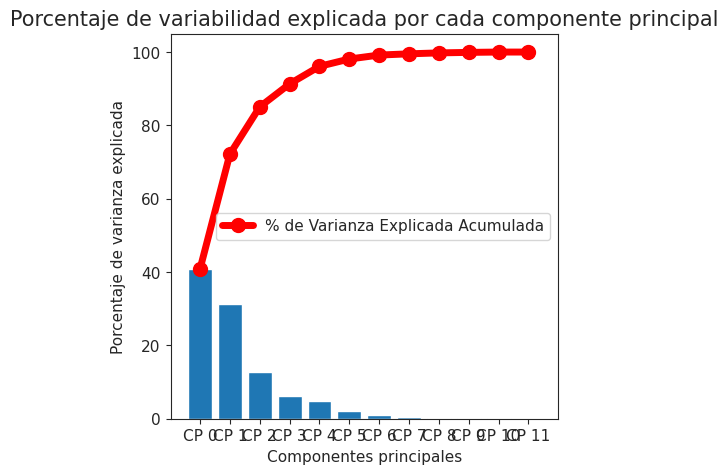

In [161]:
# Plot para representar el porcentaje de informacion acumulada
plt.figure(figsize=(5, 5))

POR_VAR=["CP %s"%i for i in range(len(var_exp1))]

plt.bar(POR_VAR, var_exp1)
plt.plot(POR_VAR, cum_var_exp1, '.-', label="% de Varianza Explicada Acumulada", c='red', linewidth=5, markersize=20)

plt.xlabel("Componentes principales", fontsize=11)
plt.ylabel("Porcentaje de varianza explicada", fontsize=11)
plt.title("Porcentaje de variabilidad explicada por cada componente principal", fontsize=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.legend(loc='best', fontsize=11)

In [162]:
# Aqui vamos a crear la matriz que representa la transformacion lineal
eigen_pairsss

[(4.905801274426103,
  array([ 0.00136943, -0.16019282, -0.14957557,  0.40258165, -0.226439  ,
         -0.18265944, -0.20348598,  0.41184785,  0.39858351,  0.42547398,
         -0.36155618,  0.15364722])),
 (3.7558977227864054,
  array([ 0.42905395,  0.42057415,  0.44404282, -0.10988262, -0.40062892,
         -0.35364128, -0.11528353, -0.08462646, -0.11242046, -0.00631365,
         -0.08739418,  0.32163379])),
 (1.5449116480893097,
  array([ 0.25416815,  0.27499071,  0.24672823,  0.27813868,  0.05099936,
          0.14853806,  0.59105637,  0.28354991,  0.27854662,  0.13711388,
          0.33681352, -0.23937056])),
 (0.7517815478829759,
  array([-0.38081555, -0.22506839, -0.12869856, -0.0043242 , -0.26350687,
         -0.59810815,  0.42639154, -0.02236709, -0.00318504, -0.08415574,
          0.34374611,  0.23023626])),
 (0.5741367030852041,
  array([ 0.23960497, -0.1620149 , -0.16138618, -0.18907414, -0.35023323,
         -0.24253505,  0.08271604, -0.04847421, -0.21087038,  0.19304611,

In [163]:
#Como necesitamos de 4 componentes para alcanzar el 90% con esos vamos a trabajar
eigen_pairsss[0][1], eigen_pairsss[1][1], eigen_pairsss[2][1], eigen_pairsss[3][1]

(array([ 0.00136943, -0.16019282, -0.14957557,  0.40258165, -0.226439  ,
        -0.18265944, -0.20348598,  0.41184785,  0.39858351,  0.42547398,
        -0.36155618,  0.15364722]),
 array([ 0.42905395,  0.42057415,  0.44404282, -0.10988262, -0.40062892,
        -0.35364128, -0.11528353, -0.08462646, -0.11242046, -0.00631365,
        -0.08739418,  0.32163379]),
 array([ 0.25416815,  0.27499071,  0.24672823,  0.27813868,  0.05099936,
         0.14853806,  0.59105637,  0.28354991,  0.27854662,  0.13711388,
         0.33681352, -0.23937056]),
 array([-0.38081555, -0.22506839, -0.12869856, -0.0043242 , -0.26350687,
        -0.59810815,  0.42639154, -0.02236709, -0.00318504, -0.08415574,
         0.34374611,  0.23023626]))

In [164]:
T_matrix1 = np.stack((eigen_pairsss[0][1], eigen_pairsss[1][1], eigen_pairsss[2][1], eigen_pairsss[3][1]), axis=1)
T_matrix1

array([[ 0.00136943,  0.42905395,  0.25416815, -0.38081555],
       [-0.16019282,  0.42057415,  0.27499071, -0.22506839],
       [-0.14957557,  0.44404282,  0.24672823, -0.12869856],
       [ 0.40258165, -0.10988262,  0.27813868, -0.0043242 ],
       [-0.226439  , -0.40062892,  0.05099936, -0.26350687],
       [-0.18265944, -0.35364128,  0.14853806, -0.59810815],
       [-0.20348598, -0.11528353,  0.59105637,  0.42639154],
       [ 0.41184785, -0.08462646,  0.28354991, -0.02236709],
       [ 0.39858351, -0.11242046,  0.27854662, -0.00318504],
       [ 0.42547398, -0.00631365,  0.13711388, -0.08415574],
       [-0.36155618, -0.08739418,  0.33681352,  0.34374611],
       [ 0.15364722,  0.32163379, -0.23937056,  0.23023626]])

In [165]:
T_matrix1.shape

(12, 4)

**2.3. Realizar la proyección de la data original al espacio reducido mediante 2 métodos y comparar resultados.**

In [166]:
# Por un primer metodo
esssp_proyectado = []

for idx in range(len(X1_std)):
    vecss = X1_std.iloc[idx, :]
    Tvecss = T_matrix1.T.dot(vecss)
    esssp_proyectado.append(Tvecss)
esssp_proyectado_np = np.array(esssp_proyectado)

In [167]:
esssp_proyectado_np.shape

(3762, 4)

In [168]:
DataFra = pd.DataFrame({'CPs1':esssp_proyectado_np[:, 0],
                        'CPs2':esssp_proyectado_np[:, 1],
                        'CPs3':esssp_proyectado_np[:, 2],
                        'CPs4':esssp_proyectado_np[:, 3]})

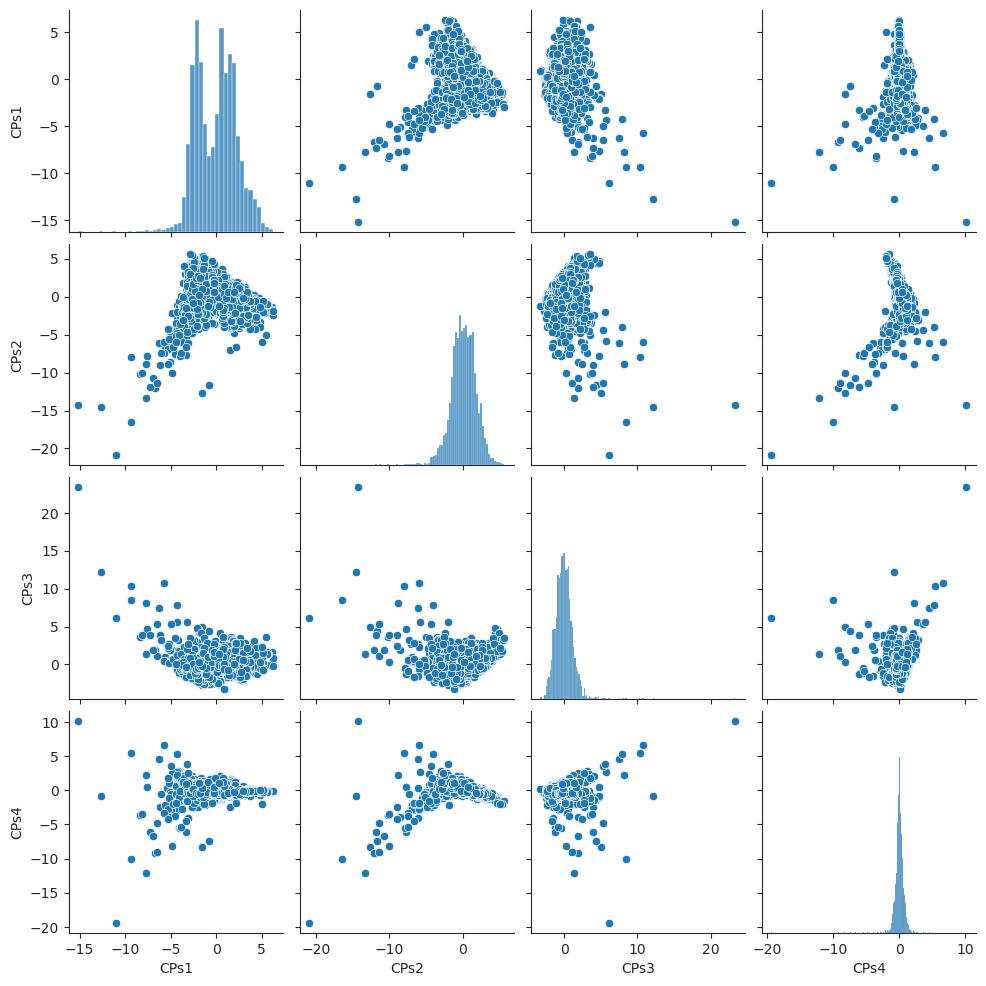

In [169]:
sns.pairplot(DataFra)

In [171]:
# Segundo Metodo
from sklearn.decomposition import PCA
pca2 = PCA(n_components=4)
data_proyectsss = pca2.fit_transform(X1_std)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


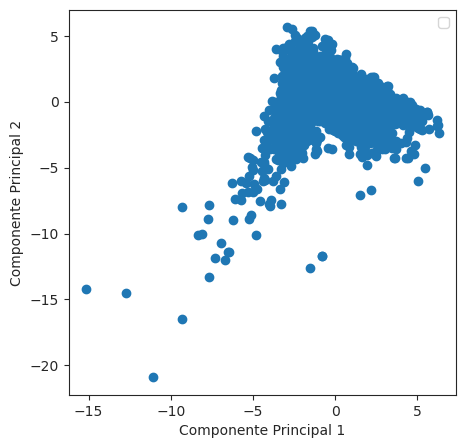

In [177]:
plt.figure(figsize=(5, 5))

plt.scatter(esssp_proyectado_np[:, 0], esssp_proyectado_np[:, 1])

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

plt.legend()
plt.show()